# MNIST Classification

### Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Create Placeholders
n_x = size of image vector = 28x28 <br>
n_y = number of classes = 10

In [0]:
def create_placeholders(n_x, n_y):
 
  X = tf.placeholder(tf.float32, [n_x, None])
  Y = tf.placeholder(tf.float32, [n_y, None])

  return X, Y

### Initialize Network Parameters
Initializing weights(W) and biases(b) for all layers <br>
Using Xavier Initializer for Weights ans Zeros Initializer for biases <br>
Each hidden layer has 1024 hidden units

In [0]:
def initialize_parameters(units = 1024):
  temp = (28 ** 2) 
  W1 = tf.get_variable("W1", [1024 , temp], initializer = tf.contrib.layers.xavier_initializer())
  b1 = tf.get_variable("b1", [1024, 1], initializer = tf.zeros_initializer())
  W2 = tf.get_variable("W2", [1024 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b2 = tf.get_variable("b2", [1024, 1], initializer = tf.zeros_initializer())
  W3 =  tf.get_variable("W3", [1024 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b3 = tf.get_variable("b3", [1024, 1], initializer = tf.zeros_initializer())
  W4 = tf.get_variable("W4", [1024 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b4 = tf.get_variable("b4", [1024, 1], initializer = tf.zeros_initializer())
  W5 = tf.get_variable("W5", [1024 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b5 = tf.get_variable("b5", [1024, 1], initializer = tf.zeros_initializer())
  
  W6 = tf.get_variable("W6", [10 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b6 = tf.get_variable("b6", [10, 1], initializer = tf.zeros_initializer())
  
  parameters = {"W1": W1,
                "b1": b1,
               "W2": W2,
                "b2": b2,
               "W3": W3,
                "b3": b3,
               "W4": W4,
                "b4": b4,
               "W5": W5,
                "b5": b5,
               "W6": W6,
                "b6": b6,
               }
  
  return parameters

### Forward Propogation
Fully Connected 5 Layer Neural Netowork <br>
Using relu activation for all hidden layers

In [0]:
def forward_propagation(X, parameters, train = True):
  W1 = parameters['W1']
  b1 = parameters['b1']
  Z1 = tf.matmul(W1, X) + b1
  A1 = tf.nn.relu(Z1)
  
  W2 = parameters['W2']
  b2 = parameters['b2']
  Z2 = tf.matmul(W2, A1) + b2
  A2 = tf.nn.relu(Z2)
  
  W3 = parameters['W3']
  b3 = parameters['b3']
  Z3 = tf.matmul(W3, A2) + b3
  A3 = tf.nn.relu(Z3)
  
  W4 = parameters['W4']
  b4 = parameters['b4']
  Z4 = tf.matmul(W4, A3) + b4
  A4 = tf.nn.relu(Z4)
  
  W5 = parameters['W5']
  b5 = parameters['b5']
  Z5 = tf.matmul(W5, A4) + b5
  A5 = tf.nn.relu(Z5)
  
  W6 = parameters['W6']
  b6 = parameters['b6']
  Z6 = tf.matmul(W6, A5) + b6
   
  if train:
    return Z6
  else:
    return A1, A2, A3, A4, A5, Z6

### Compute Cost
Loss Funtion - Cross Entropy (or Log Loss) <br>
Cost is the mean of all the losses for each prediction

In [0]:
def compute_cost(Z6, Y):
  logits = tf.transpose(Z6)
  labels = tf.transpose(Y)
  
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = labels))
  
  return cost

### Initialize Model for Training
Running the model for 50 epochs <br>
learning rate = 1e-4 <br>
minibatch size = 256 <br>
Using Adam Optimization Function


In [0]:
def model(mnist, learning_rate = 0.0001, num_epochs = 25, minibatch_size = 256, print_cost = True):
  
  tf.reset_default_graph()
  m, n_x = mnist.train.images.shape
  n_y = mnist.train.labels.shape[1]
  costs = []
  
  X, Y = create_placeholders(n_x, n_y)
  parameters = initialize_parameters()
  Z6 = forward_propagation(X, parameters)
  cost = compute_cost(Z6, Y)
  
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
  init = tf.global_variables_initializer()
  
  
  with tf.Session() as sess:
    sess.run(init)
    
    num_mini_batches = int(m/minibatch_size)
    for epoch in range(num_epochs):
      epoch_cost = 0.0
      
      for i in range(num_mini_batches):
        minibatch_X, minibatch_Y = mnist.train.next_batch(minibatch_size)
        _, minibatch_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X.T, Y:minibatch_Y.T})
        
        epoch_cost += minibatch_cost / num_mini_batches
       
      if print_cost == True and epoch % 5 == 0:
        print("Cost after epoch %i: %f" %(epoch, epoch_cost))
        
      if print_cost == True:
        costs.append(epoch_cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    parameters = sess.run(parameters)
    print ("Parameters have been trained!")

    correct_prediction = tf.equal(tf.argmax(Z6), tf.argmax(Y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: mnist.train.images.T, Y: mnist.train.labels.T}))
    print ("Test Accuracy:", accuracy.eval({X: mnist.test.images.T, Y: mnist.test.labels.T}))
    
    sess.close()
    return parameters 

### Training
Run the model

Cost after epoch 0: 0.434629
Cost after epoch 5: 0.028369
Cost after epoch 10: 0.004523
Cost after epoch 15: 0.005373
Cost after epoch 20: 0.000101


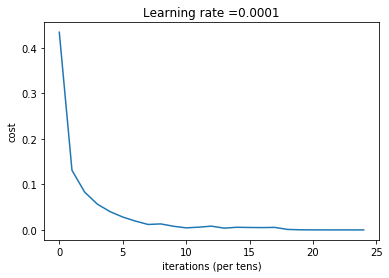

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.9826


In [7]:
parameters = model(mnist)

### FeedForward Step on 1000 test samples
Saving the outputs of each layer in the list all_out <br>
And taking the softmax of the last later and storing it in soft_out

In [0]:
test_samples = mnist.test.images[:1000]

tf.reset_default_graph()
m, n_x = test_samples.shape
X = tf.placeholder(tf.float32, [n_x, None])
all_out = forward_propagation(X, parameters, train = False)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init) 
  all_out = sess.run(all_out, feed_dict = {X: test_samples.T})
  soft_out = sess.run(tf.nn.softmax(all_out[5]))
  sess.close()

### Create Hashmap Function
Created a Hashmap to point every picture to a label

In [0]:
def create_hashmap(output):
  number_indices_hashmap = {}

  for i in range(0,10):
    number_indices_hashmap[i] = []

  for i, number in enumerate(output):
    number_indices_hashmap[number].append(i)
  
  return number_indices_hashmap

### Plotting Function
Creates a 10x10 grid of images and displays image in the row corresponding to it's predicted label

In [0]:
def plot_grid(output):
  fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize=(9,9))
  count = 0
  
  count = 1
  for i in range(1,11):
    for j in range(1,11):
      plt.subplot(10,10, count)
      plt.xticks([])
      plt.yticks([])
      if output[i-1][j-1] != None:
        plt.imshow(mnist.test.images[output[i-1][j-1]].reshape(28,28), cmap = 'binary')
      else:
        plt.imshow(np.zeros((28,28)), cmap = 'binary')
      count += 1
    
  plt.show()

### Plot for the last layer

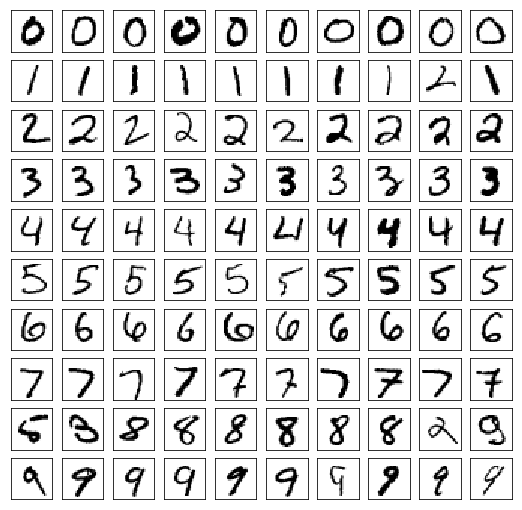

In [11]:
argmax_soft = np.argmax(soft_out, axis = 0)
hashmap = create_hashmap(argmax_soft)
plot_grid(hashmap)

### For second to the last layer, selected 10 random dimensions of the 1024 dimensions


In [0]:
second_last = all_out[4]
second_last = second_last[np.random.choice(second_last.shape[0], 10, replace=False)].T
second_last = np.argmax(second_last, axis=1)

### Plot for the second to the last layer

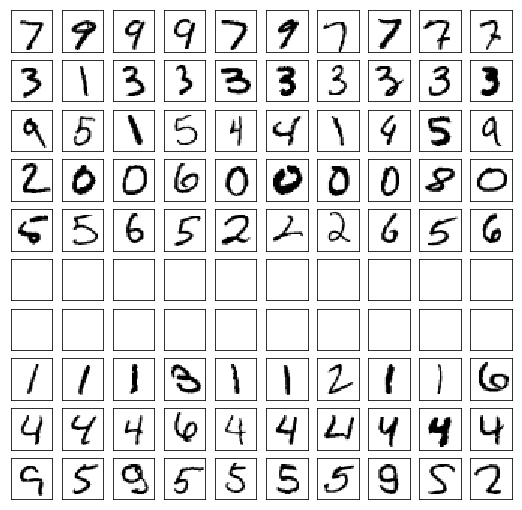

In [13]:
hashmap = create_hashmap(second_last)
for i in hashmap:
  while len(hashmap[i])<10:
    hashmap[i].append(None)

plot_grid(hashmap)

Q) Explain your observation compared with the results from 1.3 (the last layer). What can you see? What would have been the ideal situation for this second-to-the-last layer? 

Ans) In the last layer we can see that the Neural network is mostly correctly identifying each image. <br>

But for the second to the last layer 1024 units are trying to learn 1024 different feautures as they get activated when the feaure corresponding to the unit is present. <br>

We are randomly selecting 10 features from  1024 features. We can see empty boxes in the above grid as it is possible that those random 10 units didn't fire (activate) for that particular image. <br>

Also we are getting random images in the above plot because we are just considering random 10 units of 1024 units. We need almost all of them to correctly classify as they get activated when some feature which they have learnt is present in the image.

The ideal situation for the last layer would be if it selects 10 such units which are unique to each class label. Then we would get a plot similar to the last layer

### tSNE and PCA for all layers

#### Create pca and tsne objects

In [0]:
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
test_labels = mnist.test.labels[:1000]
c = np.argmax(test_labels, axis = 1)

#### Function to create plots for pca

In [0]:
def get_plots_pca(pca, c, data, title):
  targets = list(range(10))
  result = pca.fit_transform(data)

  plt.scatter(result[:, 0], result[:, 1], c = c , cmap = "Spectral")
  
  for i in range(10):
      class_label=str(i)
      indx = list(np.where(c == i)[0])
      x,y = (np.mean(result[indx], axis =0))
      plt.annotate(class_label, xy=(x,y))
      plt.title('Plot for '+ title)
  plt.show()

#### Function to create plots for tSNE

In [0]:
def get_plots_tsne(tsne, c, data, title):
  result = tsne.fit_transform(data)
  plt.scatter(result[:, 0], result[:, 1], c = c , cmap = "Spectral")
  
  for i in range(10):
      class_label=str(i)
      indx = list(np.where(c == i)[0])
      x,y = (np.mean(result[indx], axis =0))
      plt.annotate(class_label, xy=(x,y))
      
  plt.title('Plot for '+ title)
  plt.show()

#### PCA and TSNE plot for raw images

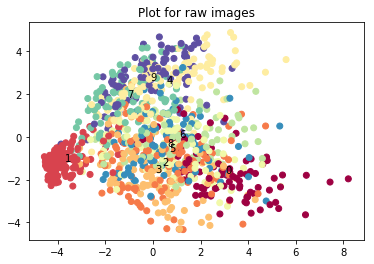

In [17]:
data = mnist.test.images[:1000]
get_plots_pca(pca, c, data, "raw images")

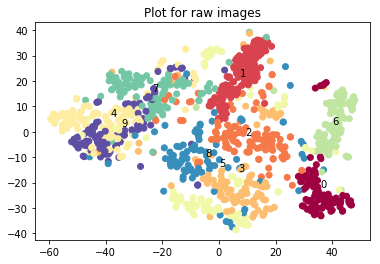

In [18]:
data = mnist.test.images[:1000]
get_plots_tsne(tsne, c, data, "raw images")

Q) Do you think this raw image samples are easy to classify? <br>

Ans) No, raw image samples aren't easy to classify as we can see that we cannot create separate decision boundaries for them

#### PCA plots for all Layers

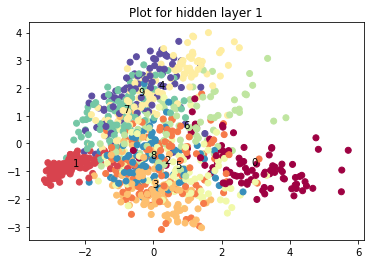

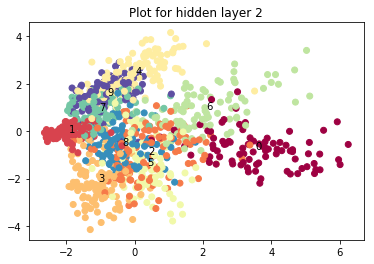

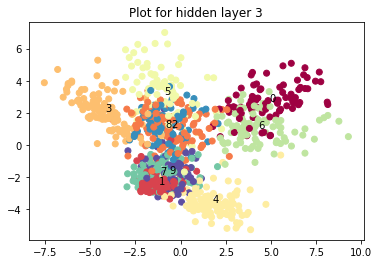

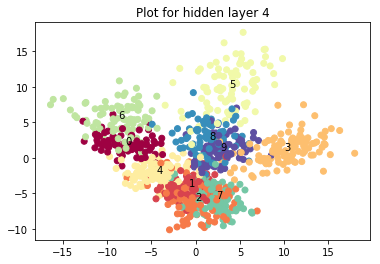

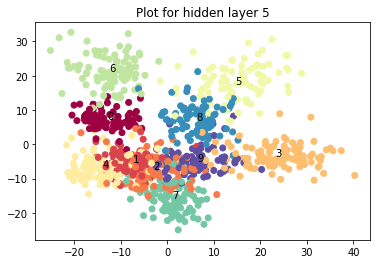

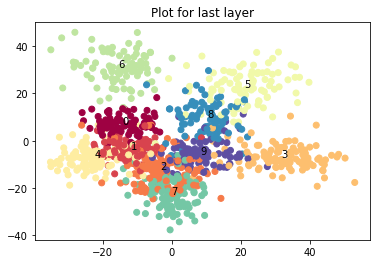

In [19]:
for i in range(len(all_out)):
  if i <= 4:
    title = "hidden layer " + str(i+1)
  else:
    title = "last layer"
  get_plots_pca(pca, c, all_out[i].T, title)

#### tSNE plots for all layers

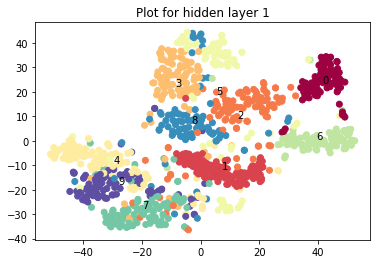

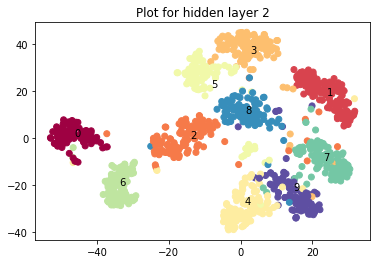

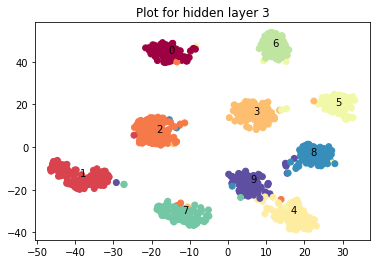

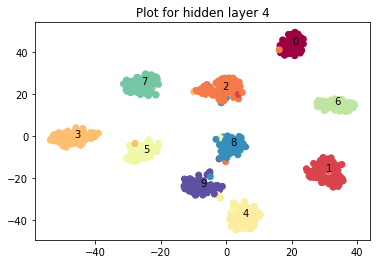

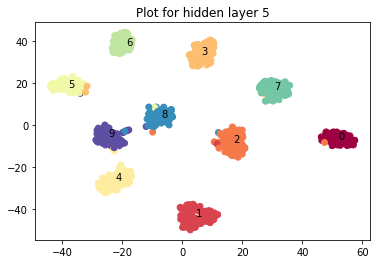

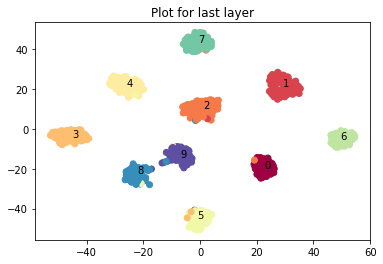

In [20]:
for i in range(len(all_out)):
  if i <= 4:
    title = "hidden layer " + str(i+1)
  else:
    title = "last layer"

  get_plots_tsne(tsne, c, all_out[i].T, title)

Q) Explain your observation. <br>

Ans) Clustering in PCA and tSNE keep on improving as we move from input layer(raw images) to the first hidden layer to the last layer. This happens because of the feauture transformation done by each layer to discriminate data (by firing relevant units/neurons).


Also, the tSNE clusters are better in comparison to PCA 